#Menghungkan ke google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = "/content/drive/MyDrive/praktikum_ml/praktikum03"

In [3]:
import pandas as pd

df = pd.read_csv(path + "/data/socr.csv")
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [5]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


##Konversi data menjadi satuan CM dan Kg
###Pra Proses Data

In [6]:
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={"Height(Inches)": "tinggi_cm",
                     "Weight(Pounds)": "berat_kg"})
    .assign(
        tinggi_cm=lambda d:d ["tinggi_cm"] * 2.54,
        berat_kg=lambda d:d ["berat_kg"] * 0.45359237)
    .round({"tinggi_cm": 2, "berat_kg": 2})
).copy()
df1.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


#Membagi Data Set
##Split data training 80% dan Data Testing 20%

---



In [7]:
from sklearn.model_selection import train_test_split

X = df1[["tinggi_cm"]] #variabel independen/bebas/fitur
y = df1["berat_kg"] #variabel dependen/terikat/target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7)

#cetak data training
X_train.head()

,tinggi_cm
3253,167.14
18789,178.49
4466,169.75
19269,181.97
6527,177.60


#Pemodelan Data

In [8]:
from sklearn.linear_model import LinearRegression
# buat object model instan dari class LinerRegresion
model = LinearRegression()
#Lakukan proses training
model.fit(X_train, y_train)

LinearRegression()

#Mengevaluasi Model

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#prediksi modek dengan data testing
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

df_resume = pd.DataFrame()
df_resume['R2'] = [r2]
df_resume['Koefisien (kg/cm)'] = [model.coef_[0]]
df_resume['Intersep (kg)'] = [model.intercept_]
df_resume['MAE(kg)'] = [mean_absolute_error(y_test, y_pred)]
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
df_resume['MSE(kg)'] = [mse]
df_resume['RMSE(kg)'] = [rmse]
display(df_resume)

,R2,Koefisien (kg/cm),Intersep (kg),MAE(kg),MSE(kg),RMSE(kg)
0,0.249893,0.551823,-37.657089,3.670411,21.242938,4.609006


#Cetak Persamaan Regresi

In [10]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Persamaan Regresi: y = {slope:.3f} * x + {intercept:.3f}")

Persamaan Regresi: y = 0.552 * x + -37.657


#Plot Regresi

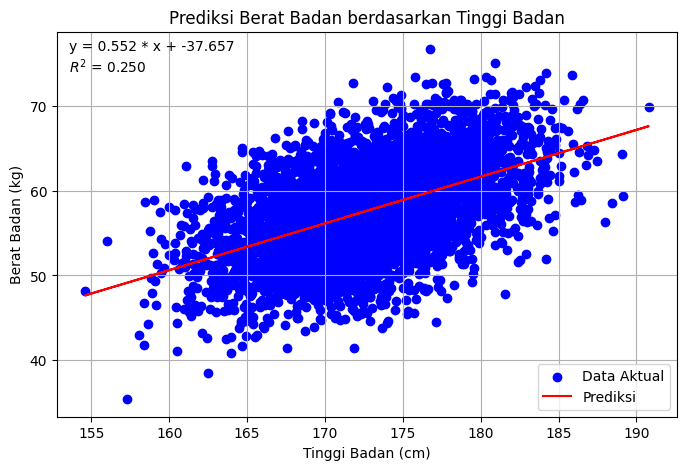

In [11]:
import matplotlib.pyplot as plt

#plot data scatter
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Data Aktual')
plt.plot(X_test, y_pred, color='red', label='Prediksi')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.title('Prediksi Berat Badan berdasarkan Tinggi Badan')
plt.text(
    0.02,0.98,
    f"y = {slope:.3f} * x + {intercept:.3f}\n$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes,va="top",
)
plt.legend()
plt.grid(True)
plt.show()

#plot garis regresi

In [12]:
y_pred_test = model.predict(X_test)
#buat tabel hasil(tinggi, aktual, prediksi, dan error)
hasil = pd.DataFrame({
    "Tinggi(cm)" : X_test["tinggi_cm"].to_numpy(),
    "Berat aktual (kg)": y_test.to_numpy(),
    "Berat prediksi (kg)": y_pred_test,
})

#1)Selisih error (positif + overpredict)
hasil["Selisih Error (kg)"] = hasil["Berat prediksi (kg)"] - hasil["Berat aktual (kg)"]

#2)Akurasi  perbaris (100*(1 - |error|/aktual)), dibatasi 0-100
denom = hasil["Berat aktual (kg)"].replace(0, np.nan)
hasil["Akurasi (%)"] = (1 - (hasil["Selisih Error (kg)"].abs() / denom)).clip(lower=0, upper=1)*100

hasil

,Tinggi(cm),Berat aktual (kg),Berat prediksi (kg),Selisih Error (kg),Akurasi (%)
0,174.73,50.16,58.762990,8.602990,82.848904
1,171.31,50.33,56.875754,6.545754,86.994329
2,169.29,58.22,55.761071,-2.458929,95.776488
3,163.30,58.92,52.455650,-6.464350,89.028598
4,170.52,63.06,56.439814,-6.620186,89.501766
...,...,...,...,...,...
4995,178.75,56.59,60.981319,4.391319,92.240114
4996,163.05,47.45,52.317694,4.867694,89.741425
4997,166.51,52.46,54.227003,1.767003,96.631715
4998,167.70,49.90,54.883672,4.983672,90.012681


In [13]:
df_ti2022 = pd.read_csv(path + "/data/berat_ti2022.csv")
df_ti2022

,No.,Nama,tinggi_cm,actual_berat
0,1,Rafa,168,58.5
1,2,Tiara,162,78.2
2,3,Tia,155,52.7
3,4,Keyla,160,70.3
4,5,Bani,183,65.8


In [14]:
X_testing = df_ti2022[["tinggi_cm"]]
X_testing

,tinggi_cm
0,168
1,162
2,155
3,160
4,183


In [15]:
y_pred_testing = model.predict(X_testing)

##Masukan dalam dataframe
df_ti2022["Prediksi (kg)"] = y_pred_testing
df_ti2022["Selisih Error (kg)"] = df_ti2022["Prediksi (kg)"] - df_ti2022["actual_berat"]
denom = df_ti2022["actual_berat"].replace(0, np.nan)
df_ti2022["Akurasi (%)"] = (1 - (df_ti2022["Selisih Error (kg)"].abs() / denom)).clip(lower=0, upper=1)*100
df_ti2022

,No.,Nama,tinggi_cm,actual_berat,Prediksi (kg),Selisih Error (kg),Akurasi (%)
0,1,Rafa,168,58.5,55.049219,-3.450781,94.101229
1,2,Tiara,162,78.2,51.738280,-26.461720,66.161483
2,3,Tia,155,52.7,47.875517,-4.824483,90.845383
3,4,Keyla,160,70.3,50.634633,-19.665367,72.026505
4,5,Bani,183,65.8,63.326568,-2.473432,96.240985


In [16]:
df_ti2022.describe()

,No.,tinggi_cm,actual_berat,Prediksi (kg),Selisih Error (kg),Akurasi (%)
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.000000,165.600000,65.100000,53.724843,-11.375157,83.875117
std,1.581139,10.784248,9.955652,5.950999,10.969045,13.786181
min,1.000000,155.000000,52.700000,47.875517,-26.461720,66.161483
25%,2.000000,160.000000,58.500000,50.634633,-19.665367,72.026505
50%,3.000000,162.000000,65.800000,51.738280,-4.824483,90.845383
75%,4.000000,168.000000,70.300000,55.049219,-3.450781,94.101229
max,5.000000,183.000000,78.200000,63.326568,-2.473432,96.240985
